In [1]:
import sys
sys.path.append("..")
from tqdm import trange

In [2]:
from environment.exploration_env import ExplorationEnv
from utils.reader import get_yaml_path, read_file

In [3]:
from agent.qagent import QAgent
from training.general_qlearning import QLearning

In [4]:
import pygame
import numpy as np

In [5]:
server_address = "localhost:50051"
client_name = "RLClient"
env = ExplorationEnv(server_address, client_name)
await env.connect_to_client()

✓ Connected to localhost:50051



In [6]:
config_path = get_yaml_path("resources", "configurations", "exploration.yml")
config = read_file(config_path)
print(config)

simulation:
    seed: 42
    duration: 1000000
environment:
    width: 10
    height: 10
    entities:
        - agent:
              id: 00000000-0000-0000-0000-000000000001
              radius: 0.25
              withProximitySensors: true
              withLightSensors: true
              position: [1.0, 4.0]
              orientation: 0.0
              speed: 1.0
              reward: Exploration
              termination: EndSimulationTermination
              truncation: ObstacleAvoidance


In [7]:
await env.init(config)

✓ Initialization successful


In [8]:
agent = QAgent(env)
agentId = "00000000-0000-0000-0000-000000000001"
agents = { agentId: agent }

In [9]:
episodes = 600
steps = 1000

In [10]:
trainer = QLearning(env, agents, episode_count=episodes, max_steps_per_episode=steps)

In [11]:
rewards = await trainer.train(render=False, record_history=True)

Training: 100%|██████████| 600/600 [46:00<00:00,  4.60s/ep]


In [12]:
print("Reward medio ultimi 50 episodi:", sum(rewards[agentId][-50:]) / 50)

Reward medio ultimi 50 episodi: 1910.3339302723193


In [16]:
eval_results = await trainer.evaluate(test_episode_count=3, render=True)
print("Average evaluation reward:", eval_results[agentId])

Evaluation: 100%|██████████| 3/3 [02:02<00:00, 40.83s/ep]
[00000000-0000-0000-0000-000000000001] Avg steps: 1000.0 | Avg reward: 9537.3


Average evaluation reward: {'total_reward': 28611.8475745618, 'avg_steps': 1000.0, 'avg_total_reward': 9537.282524853934}


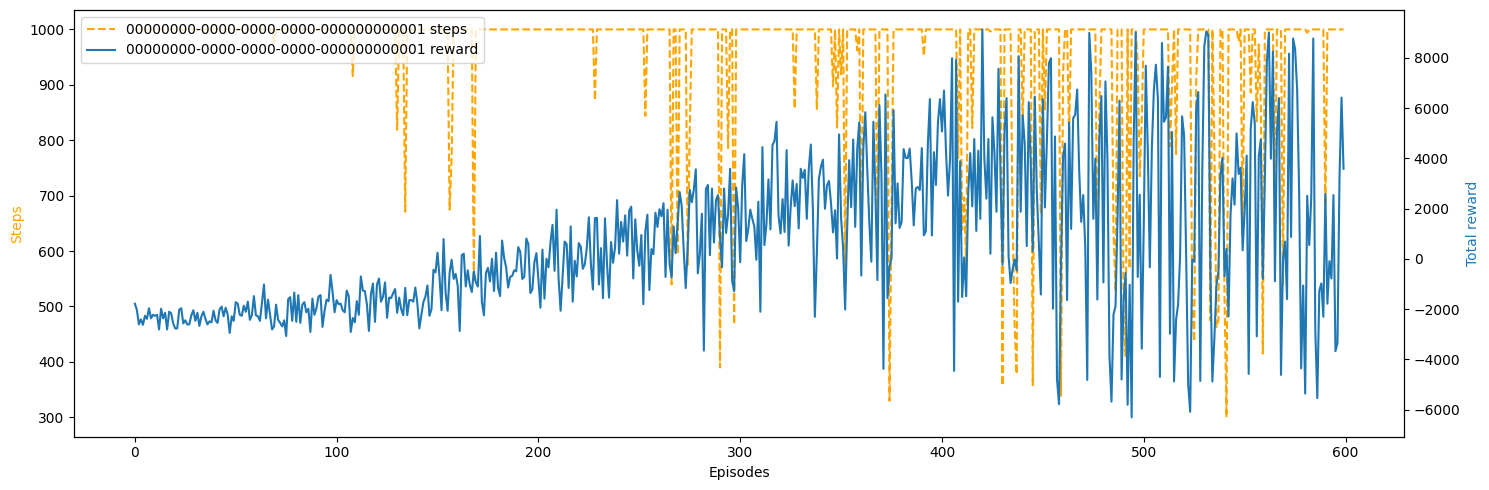

In [14]:
from utils.plotting import plot_learning_history

plot_learning_history(trainer.learning_history)